In [13]:
# AWG Control
import sys
sys.path.append('C:\Program Files\Keysight\SD1\Libraries\Python')
import keysightSD1

waveform_data_list = [.01, .02, .03, .04, .05, .06, .07, .08, .09, .1,
                      .11, .12, .13, .14, .15, .16, .17, .18, .19, .2,
                      .21, .22, .23, .24, .25, .26, .27, .28, .29, .3,
                      .31, .32, .33, .34, .35, .36, .37, .38, .39, .4,
                      .41, .42, .43, .44, .45, .46, .47, .48, .49, .5,
                      .51, .52, .53, .54, .55, .56, .57, .58, .59, .6,
                      .61, .62, .63, .64, .65, .66, .67, .68, .69, .7,
                      .71, .72, .73, .74, .75, .76, .77, .78, .79, .8,
                      .81, .82, .83, .84, .85, .86, .87, .88, .89, .9,
                      .91, .92, .93, .94, .95, .96, .97, .98, .99,  1]



# MODULE CONSTANTS
PRODUCT = "M3202A"
CHASSIS = 1
SLOT = 3
CHANNEL = 4
AMPLITUDE = .1 

# CREATE AND OPEN MODULE
AWG = keysightSD1.SD_AOU()
moduleID = AWG.openWithSlot(PRODUCT, CHASSIS, SLOT)
if moduleID < 0:
    print("Module open error: ", moduleID)
else:
    print("Module opened: ", moduleID)
    print("Module name: ", AWG.getProductName())
    print("Slot: ", AWG.getSlot())
    print("Chassis: ", AWG.getChassis())
    print()
    AWG.channelWaveShape(CHANNEL, keysightSD1.SD_Waveshapes.AOU_AWG)
    AWG.channelAmplitude(CHANNEL, AMPLITUDE)
    # WAVEFORM FROM FILE
    WAVE_NUMBER = 0
    # create, open from file, load to module RAM and queue for execution
    wave = keysightSD1.SD_Wave()
    # set path to your file here
    wave.newFromFile("C:/Users/Public/Documents/keysightSD1/Examples/Waveforms/Gaussian.csv")
    AWG.waveformLoad(wave, WAVE_NUMBER)
    AWG.AWGqueueWaveform(CHANNEL, WAVE_NUMBER, 0, 0, 0, 0)
    error = AWG.AWGstart(CHANNEL)
    if error < 0:
        print("AWG from file error: ", error)
    else: 
        print("AWG from file started successfully")
    input("Press any key to stop AWG")
    AWG.AWGflush(CHANNEL)
    AWG.AWGstop(CHANNEL)
    input("Press any key to start AWG from array")
    # WAVEFROM FROM ARRAY/LIST
    # This function is equivalent to create a waveform with new,
    # and then to call waveformLoad, AWGqueueWaveform and AWGstart
    error = AWG.AWGfromArray(CHANNEL, 0, 0, 0, 0, 0, waveform_data_list)
    if error < 0:
        print("AWG from array error: ", error)
    else:
        print("AWG from array started successfully")
    # exiting...
    input("Press any key to stop AWG")
    AWG.AWGflush(CHANNEL)
    AWG.AWGstop(CHANNEL)
    AWG.close()
    print()
    print("AOU closed")
    
    

Module opened:  268435457
Module name:  M3202A
Slot:  3
Chassis:  1

AWG from file started successfully
Press any key to stop AWGa
Press any key to start AWG from arraya
AWG from array started successfully
Press any key to stop AWGa

AOU closed


In [12]:
# Digitizer Control
# MODULE CONSTANTS
PRODUCT = "M3102A"
CHASSIS = 1
SLOT = 7
CHANNEL = 4
# CREATE AND OPEN MODULE
DIG = keysightSD1.SD_AIN()
moduleID = DIG.openWithSlot(PRODUCT, CHASSIS, SLOT)
if moduleID < 0:
    print("Module open error:", moduleID)
else:
    print("Module opened:", moduleID)
    print("Module name:", DIG.getProductName())
    print("slot:", DIG.getSlot())
    print("Chassis:", DIG.getChassis())
    print()
    # CONFIGURE AND START DAQ
    POINTS_PER_CYCLE = 100
    CYCLES = 500
    TRIGGER_DELAY = 0
    DIG.DAQconfig(CHANNEL, POINTS_PER_CYCLE, CYCLES, TRIGGER_DELAY,
    keysightSD1.SD_TriggerModes.SWHVITRIG)
    DIG.DAQstart(CHANNEL)
    input("Press any key to provide trigger")
    DIG.DAQtrigger(CHANNEL)
    # READ DATA
    TIMEOUT = 1
    dataRead = DIG.DAQread(CHANNEL, POINTS_PER_CYCLE * CYCLES, TIMEOUT)
    print(dataRead)
    # exiting...
    DIG.close()
    print()
    print("AIN closed")

Module open error: -8080


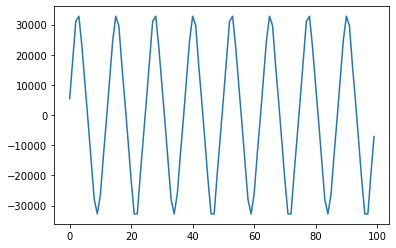

In [7]:
import matplotlib.pyplot as plt
plt.plot(dataRead)